In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [283]:
pd.set_option('display.max_columns', None)

In [284]:
df = pd.read_csv(r'Datasets/gurgaon_properties_outlier_treated.csv')

In [285]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,shree vardhman flora,sector 90,0.70,5178.0,1352.0,Carpet area: 1352 (125.6 sq.m.),2.0,3.0,2,7.0,North,Relatively New,NaN,NaN,1351.95,1,0,0,0,0,1,49,676.0
1,house,independent,sector 69,0.80,10485.0,763.0,Built Up area: 763 (70.89 sq.m.),1.0,1.0,0,1.0,NaN,Undefined,NaN,763.05,NaN,0,0,0,0,0,0,0,763.0
2,flat,experion the heartsong,sector 108,0.98,13351.0,734.0,Super Built up area 1283(119.19 sq.m.)Built Up...,2.0,3.0,3,4.0,East,Relatively New,1282.95,978.23,734.43,1,0,0,0,0,0,135,367.0
3,flat,pioneer park,sector 61,1.60,11594.0,1380.0,Carpet area: 1380 (128.21 sq.m.),2.0,2.0,2,21.0,NaN,Relatively New,NaN,NaN,1380.04,0,1,0,0,0,0,105,690.0
4,flat,pivotal devaan,sector 84,0.41,7033.0,583.0,Super Built up area 583(54.16 sq.m.)Built Up a...,2.0,2.0,2,10.0,East,New Property,582.97,565.00,483.00,0,0,0,0,0,1,23,291.5


In [286]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1010
agePossession             0
super_built_up_area    1671
built_up_area          1966
carpet_area            1711
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

### Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

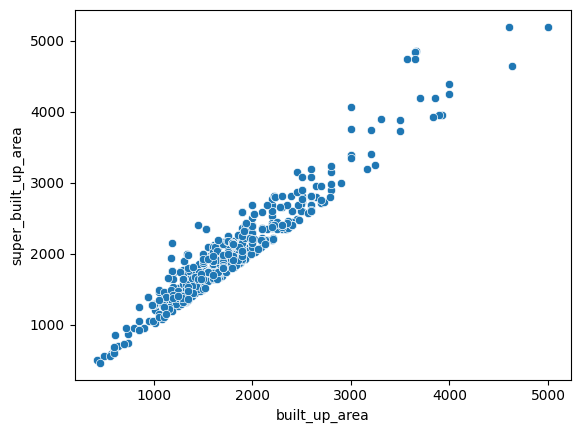

In [287]:
sns.scatterplot(x='built_up_area', y='super_built_up_area', data=df)

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

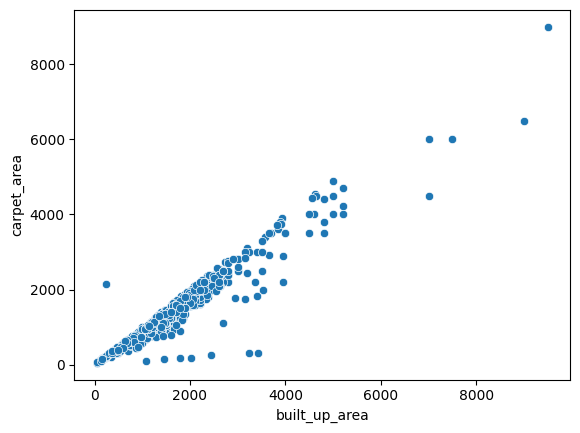

In [288]:
sns.scatterplot(x = 'built_up_area' , y = 'carpet_area' , data = df)

In [289]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3541    False
3542    False
3543    False
3544    False
3545    False
Length: 3546, dtype: bool

In [290]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [291]:
all_present_df.shape

(531, 24)

In [292]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [293]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [294]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.1052842105263159 0.9


In [295]:
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [296]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
10,flat,pioneer park,sector 61,2.10,11667.0,1800.0,Super Built up area 1800(167.23 sq.m.)Carpet a...,3.0,3.0,3,15.0,South-East,Relatively New,1800.05,NaN,1400.00,0,0,0,0,0,1,49,600.000000
13,flat,vatika city homes,sector 83,1.08,6207.0,1740.0,Super Built up area 1740(161.65 sq.m.)Carpet a...,3.0,3.0,3,6.0,South-West,Relatively New,1739.98,NaN,1350.00,0,0,1,0,0,0,111,580.000000
15,flat,tulip ivory,sector 70,2.00,8333.0,2400.0,Super Built up area 2400(222.97 sq.m.)Carpet a...,4.0,5.0,3+,6.0,East,Moderately Old,2400.03,NaN,1850.00,0,1,0,0,0,1,95,600.000000
25,flat,emaar gurgaon greens,sector 102,1.54,9333.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3.0,3.0,3,12.0,North-East,Relatively New,1650.00,NaN,1022.58,0,1,0,0,0,0,61,550.000000
27,flat,emaar mgf palm hills,sector 77,1.50,12744.0,1177.0,Super Built up area 1450(134.71 sq.m.)Carpet a...,3.0,3.0,3,4.0,North-East,Relatively New,1450.00,NaN,1177.00,0,0,0,0,0,1,97,392.333333


In [297]:
sbc_df['built_up_area'].fillna(
    (((sbc_df['super_built_up_area'] / 1.105) + (sbc_df['carpet_area'] / 0.9)) / 2).round(),
    inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_10804\392104756.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(
C:\Users\dell\AppData\Local\Temp\ipykernel_10804\392104756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(


In [298]:
df.update(sbc_df)

In [299]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1010
agePossession             0
super_built_up_area    1671
built_up_area          1544
carpet_area            1711
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [300]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [301]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
6,flat,pareena mi casa,sector 68,1.10,8835.0,1245.0,Super Built up area 1245(115.66 sq.m.),2.0,2.0,3,11.0,North,New Property,1244.95,NaN,NaN,0,0,0,0,0,0,95,622.500000
9,flat,m3m soulitude,sector 89,1.25,8784.0,1423.0,Super Built up area 1423(132.2 sq.m.),3.0,3.0,3,3.0,East,New Property,1422.99,NaN,NaN,1,0,0,0,1,0,61,474.333333
14,flat,ss the leaf,sector 85,1.77,7350.0,2408.0,Super Built up area 2408(223.71 sq.m.),3.0,4.0,3+,7.0,South-West,New Property,2407.99,NaN,NaN,0,0,1,0,0,0,107,802.666667
17,flat,godrej summit,sector 104,0.75,5910.0,1269.0,Super Built up area 1269(117.89 sq.m.),2.0,2.0,3,6.0,East,Relatively New,1268.96,NaN,NaN,0,0,0,0,1,0,79,634.500000
29,flat,pareena coban residences,sector 99a,1.56,7812.0,1997.0,Super Built up area 1997(185.53 sq.m.),3.0,5.0,3,4.0,North-East,New Property,1997.03,NaN,NaN,0,1,0,0,1,0,49,665.666667


In [302]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_10804\1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_10804\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round

In [303]:
df.update(sb_df)

In [304]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1010
agePossession             0
super_built_up_area    1671
built_up_area           670
carpet_area            1711
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [305]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [306]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,shree vardhman flora,sector 90,0.70,5178.0,1352.0,Carpet area: 1352 (125.6 sq.m.),2.0,3.0,2,7.0,North,Relatively New,NaN,NaN,1351.95,1,0,0,0,0,1,49,676.0
3,flat,pioneer park,sector 61,1.60,11594.0,1380.0,Carpet area: 1380 (128.21 sq.m.),2.0,2.0,2,21.0,NaN,Relatively New,NaN,NaN,1380.04,0,1,0,0,0,0,105,690.0
20,flat,experion windchants,sector 112,3.10,20667.0,1500.0,Carpet area: 1500 (139.35 sq.m.),2.0,2.0,3,9.0,NaN,Relatively New,NaN,NaN,1499.95,1,1,1,0,0,1,80,750.0
21,flat,green court,new,0.38,5507.0,690.0,Carpet area: 690 (64.1 sq.m.),2.0,2.0,1,7.0,NaN,Under Construction,NaN,NaN,689.97,0,0,0,0,0,0,35,345.0
22,flat,dlf regency park,sector 28,1.60,14545.0,1100.0,Carpet area: 1100 (102.19 sq.m.),2.0,2.0,2,3.0,North,Relatively New,NaN,NaN,1099.96,0,0,0,0,0,0,52,550.0


In [307]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_10804\2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_10804\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet

In [308]:
df.update(c_df)

In [309]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1010
agePossession             0
super_built_up_area    1671
built_up_area             0
carpet_area            1711
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

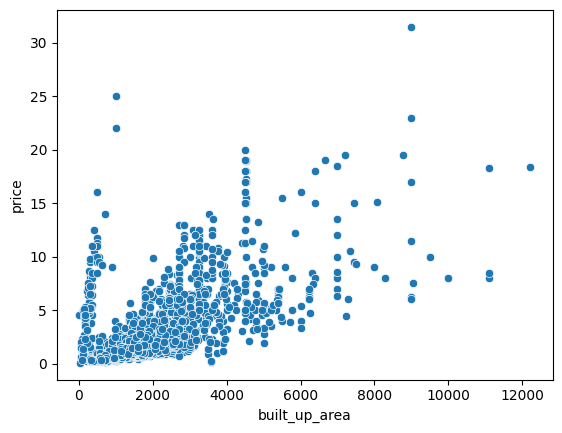

In [310]:
sns.scatterplot(x = 'built_up_area', y = 'price' , data=df)

In [311]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [312]:
anamoly_df.sample(5)

,price,area,built_up_area
422,3.75,1620.0,333.0
2212,2.55,1630.0,1811.0
3017,11.00,4125.0,500.0
1244,5.80,1935.0,1935.0
2710,4.99,2642.0,270.0


In [313]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [314]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

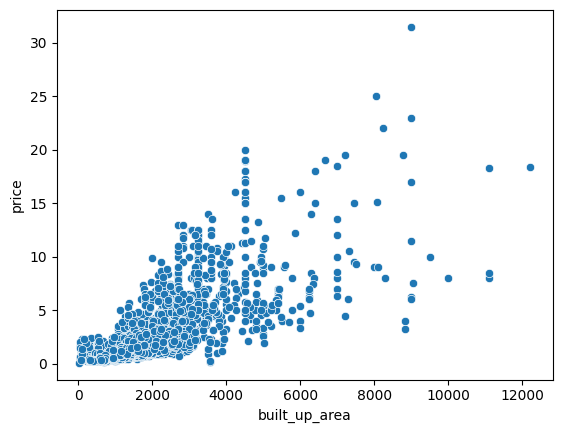

In [315]:
sns.scatterplot(x='built_up_area',y='price',data = df)

In [316]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [317]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,shree vardhman flora,sector 90,0.70,5178.0,2.0,3.0,2,7.0,North,Relatively New,1502.00,1,0,0,0,0,1,49
1,house,independent,sector 69,0.80,10485.0,1.0,1.0,0,1.0,NaN,Undefined,763.05,0,0,0,0,0,0,0
2,flat,experion the heartsong,sector 108,0.98,13351.0,2.0,3.0,3,4.0,East,Relatively New,978.23,1,0,0,0,0,0,135
3,flat,pioneer park,sector 61,1.60,11594.0,2.0,2.0,2,21.0,NaN,Relatively New,1533.00,0,1,0,0,0,0,105
4,flat,pivotal devaan,sector 84,0.41,7033.0,2.0,2.0,2,10.0,East,New Property,565.00,0,0,0,0,0,1,23


In [318]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1010
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### floorNum

In [319]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
151,flat,NaN,sector 78,0.60,3692.0,2.0,2.0,0,NaN,NaN,Under Construction,1625.03,0,0,0,0,0,0,0
162,house,independent,sector 7,6.50,15046.0,3.0,2.0,3+,NaN,NaN,Old Property,4320.00,0,0,0,0,0,0,9
261,house,independent,sector 4,4.12,8889.0,2.0,1.0,3+,NaN,NaN,Moderately Old,4635.00,0,0,0,0,0,0,0
381,house,dlf new town heights,sector 86,2.47,7719.0,4.0,4.0,3+,NaN,West,Moderately Old,2800.00,0,1,0,1,0,1,130
741,house,independent,sector 4,0.65,11111.0,4.0,2.0,2,NaN,NaN,Moderately Old,585.00,0,0,0,0,0,0,0
1343,house,independent,sector 3,1.50,10288.0,3.0,3.0,0,NaN,NaN,Old Property,210.00,0,0,0,0,0,0,0
1507,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,1,NaN,NaN,Relatively New,3240.00,0,0,0,0,0,0,21
1539,house,emaar mgf marbella,sector 66,9.00,21251.0,4.0,4.0,3+,NaN,South-West,Relatively New,5200.00,0,1,1,1,0,1,114
1548,flat,experion heartsong,dwarka expressway,1.08,6150.0,3.0,3.0,0,NaN,NaN,Under Construction,1757.96,0,0,0,0,0,0,0
1759,house,ansal sushant lok,sector 43,10.50,27911.0,4.0,4.0,2,NaN,North-East,Old Property,3762.00,0,1,0,0,0,0,59


In [320]:
df[df['property_type'] == 'house']['floorNum'].median()

np.float64(2.0)

In [321]:
df['floorNum'].fillna(2.0,inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_10804\15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [322]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1010
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [323]:
1010/df.shape[0]

0.28482797518330516

### facing

<Axes: ylabel='count'>

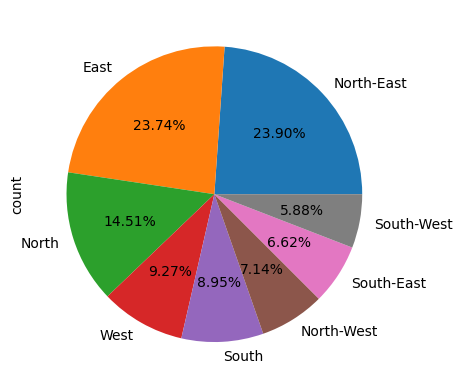

In [324]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [325]:
df.drop(columns=['facing'],inplace=True)

In [326]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3061,house,independent,sector 3,0.90,8929.0,3.0,3.0,0,2.0,Undefined,112.05,0,0,0,0,0,0,0
1811,flat,smriti apartment,sector 56,0.52,10656.0,1.0,1.0,1,1.0,Old Property,475.00,0,0,0,0,0,0,34
2341,flat,shree vardhman flora,sector 90,1.00,5128.0,3.0,4.0,3,8.0,New Property,1765.00,0,1,0,0,0,0,95
2572,flat,la vida by tata housing,sector 113,1.45,11364.0,2.0,2.0,2,6.0,Relatively New,1080.00,0,0,0,0,0,0,80
2098,flat,bptp terra,sector 37d,1.71,7805.0,3.0,3.0,3+,7.0,Relatively New,2190.99,1,0,0,0,0,0,38


In [327]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [328]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
151,flat,NaN,sector 78,0.6,3692.0,2.0,2.0,0,2.0,Under Construction,1625.03,0,0,0,0,0,0,0


In [329]:
df.drop(index=[151],inplace=True)

In [330]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### agePossession

In [331]:
df['agePossession'].value_counts()

agePossession
Relatively New        1604
New Property           556
Moderately Old         541
Old Property           292
Undefined              290
Under Construction     262
Name: count, dtype: int64

In [332]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1,house,independent,sector 69,0.80,10485.0,1.0,1.0,0,1.0,Undefined,763.05,0,0,0,0,0,0,0
18,house,independent,sector 109,1.55,6568.0,3.0,2.0,0,1.0,Undefined,2359.99,0,0,0,0,0,0,0
36,flat,sare crescent parc,sector 92,1.00,4778.0,4.0,4.0,3,9.0,Undefined,2093.04,0,0,0,0,0,0,0
43,flat,ansal plaza,sector 2,1.00,10000.0,2.0,3.0,0,1.0,Undefined,999.97,0,0,0,0,0,0,0
56,flat,sidhartha ncr one phase,sector 95,0.46,4646.0,2.0,2.0,0,6.0,Undefined,989.96,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458,flat,dlf icon,sector 43,5.80,20707.0,4.0,4.0,3+,18.0,Undefined,2800.98,0,0,0,0,0,0,0
3464,flat,czar mahira homes 63a,sector 63a,0.42,7407.0,3.0,2.0,2,1.0,Undefined,630.00,0,0,0,0,0,0,0
3482,flat,godrej nature plus,sector 33,1.25,9025.0,2.0,2.0,3,17.0,Undefined,1384.99,0,0,0,0,0,0,56
3490,flat,sare crescent parc,sector 92,0.95,5013.0,4.0,5.0,3+,13.0,Undefined,1894.98,0,0,0,0,0,0,0


In [333]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [334]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [335]:
df['agePossession'].value_counts()

agePossession
Relatively New        1717
New Property           594
Moderately Old         580
Old Property           325
Under Construction     276
Undefined               53
Name: count, dtype: int64

In [336]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [337]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [338]:
df['agePossession'].value_counts()

agePossession
Relatively New        1726
New Property           595
Moderately Old         587
Old Property           328
Under Construction     276
Undefined               33
Name: count, dtype: int64

In [339]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [340]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [341]:
df['agePossession'].value_counts()

agePossession
Relatively New        1728
Moderately Old         618
New Property           595
Old Property           328
Under Construction     276
Name: count, dtype: int64

In [345]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [343]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [346]:
df.shape

(3545, 18)